# Perzeptron für MFCC

In [2]:
max_file_count = None
none_replacement = 'all'

RANDOM_STATE = 42

## MFCC Daten lesen

🔗 siehe [generate.ipynb](generate.ipynb)

In [4]:
import numpy as np

feature_matrix = np.load(f'feature_{max_file_count or none_replacement}.npy')
labels = np.load(f'labels_{max_file_count or none_replacement}.npy')

## Aufteilung in Trainings- und Testdaten

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(np.abs(feature_matrix), labels,
                                                    test_size=0.2, random_state=RANDOM_STATE)

In [6]:
print(X_train.shape)
print(X_test.shape)

(31763, 44)
(7941, 44)


## Training des Perzeptrons

In [7]:
from sklearn.linear_model import Perceptron

model = Perceptron(n_jobs=4, random_state=RANDOM_STATE)
model.fit(X_train, y_train)

Perceptron(n_jobs=4, random_state=42)

In [8]:
import skops.io as sio
sio.dump(model, f'perceptron_{max_file_count or none_replacement}.skops')

## Leistung des Modells

In [9]:
y_test_predict = model.predict(X_test)

In [10]:
from sklearn import metrics

# proportion of correct predictions
print(f'accuracy:  {metrics.accuracy_score(y_test, y_test_predict):.4f}')

# proportion of true positives under all positives
print(f'precision: {metrics.precision_score(y_test, y_test_predict):.4f}')

# proportion of true positives under actually positives
print(f'recall:    {metrics.recall_score(y_test, y_test_predict):.4f}')

# total performance
print(f'f1:        {metrics.f1_score(y_test, y_test_predict):.4f}')

accuracy:  0.9919
precision: 0.2500
recall:    0.0161
f1:        0.0303


In [11]:
print(metrics.classification_report(y_test, y_test_predict, zero_division=0))

              precision    recall  f1-score   support

          -1       0.99      1.00      1.00      7879
           1       0.25      0.02      0.03        62

    accuracy                           0.99      7941
   macro avg       0.62      0.51      0.51      7941
weighted avg       0.99      0.99      0.99      7941



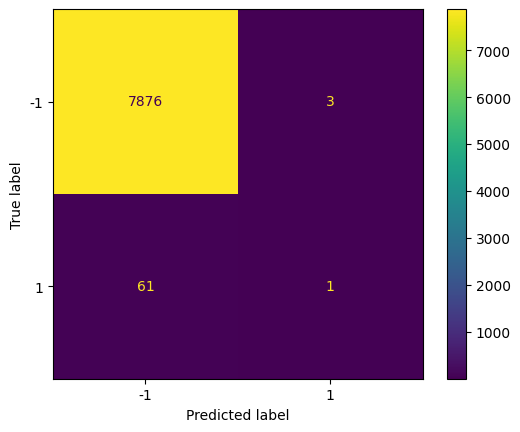

In [12]:
_ = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_test_predict)